In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as mpl
from IPython.display import display

In [2]:
from matplotlib.colors import ListedColormap

In [3]:
pip install ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [4]:
import ipywidgets as widgets

In [5]:
%matplotlib notebook

# **James Carlo V. Bala**

##   *2022104509*



In [6]:
df = pd.read_csv('Original_data_with_more_rows1.csv')

In [7]:
columns_to_drop = ['Unnamed', 'LunchType']

In [8]:
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [9]:
colors = {'male':'red','female':'blue'}

# Here, we are creating a line graph to show the average math and reading scores for both genders.
This line graph allows us to visualize how the average scores compare between genders for each subject.

In [18]:
plt.figure(figsize=(10,6))
for gender, color in colors.items():
    avg_math_score = df[df['Gender'] == gender]['MathScore'].mean()
    avg_reading_score = df[df['Gender'] == gender]['ReadingScore'].mean()
    plt.plot(['MathScore', 'ReadingScore'], [avg_math_score, avg_reading_score], color=color, marker='o')
plt.xlabel('Subject')
plt.ylabel('Average Score')
plt.title('Average Scores by Gender')
plt.legend(colors.keys())
plt.show()

<IPython.core.display.Javascript object>

## It can be observed that the Average Math score of males are lower than the female average score. Additionally, males dominate in the average reading score. 

In [11]:
df = df.sample(n=1000, random_state=1)

In [12]:


# Create bins for MathScore
bin_size = 10
bins = np.arange(0, df['MathScore'].max() + bin_size, bin_size)

# Create a figure and axis for the histogram
fig, ax = plt.subplots()

# Initialize selected_gender
selected_gender = 'All'

# Create dropdown for gender selection
gender_dropdown = widgets.Dropdown(
    options=['All', 'male', 'female'],
    value='All',
    description='Gender:',
)

def dropdown_changed(change):
    global selected_gender
    selected_gender = change.new

gender_dropdown.observe(dropdown_changed, names='value')

def update_plot(n):
    ax.clear()
    if selected_gender == 'All':
        for gender, color in colors.items():
            data = df[df['Gender'] == gender]['MathScore'][:n]
            ax.hist(data, bins=bins, color=color, alpha=0.5)
    else:
        data = df[df['Gender'] == selected_gender]['MathScore'][:n]
        ax.hist(data, bins=bins, color=colors[selected_gender], alpha=0.5)
    ax.legend(colors.keys())
    # Set x and y labels
    ax.set_xlabel('Math Score')
    ax.set_ylabel('Count')
    fig.canvas.draw()

# Create slider
slider = widgets.IntSlider(min=1, max=len(df), description='Slide to view', step=bin_size)

def slider_changed(change):
    update_plot(change.new)

slider.observe(slider_changed, names='value')

# Create play button
play_button = widgets.Button(description="Play")

def play_clicked(b):
    for i in range(slider.value, len(df) + 1, bin_size):
        slider.value = i

play_button.on_click(play_clicked)

# Create stop button
stop_button = widgets.Button(description="Stop")

def stop_clicked(b):
    pass  

stop_button.on_click(stop_clicked)


display(gender_dropdown)
display(widgets.HBox([play_button, stop_button, slider]))



<IPython.core.display.Javascript object>

Dropdown(description='Gender:', options=('All', 'male', 'female'), value='All')

In [13]:
fig2 = px.scatter_3d(df, x='MathScore', y='ReadingScore', z='WritingScore',
                     color='Gender', color_discrete_map = {'male':'red', 'female':'blue'},
                     opacity=0.8, size_max=10,
                     labels={
                         'MathScore': 'Math Score',
                         'ReadingScore': 'Reading Score',
                         'WritingScore': 'Writing Score'
                     },
                     title='3D Scatter Plot of Scores',
                     hover_name='Gender',)

fig2.update_layout(autosize=False, width=800, height=800, margin=dict(l=50, r=50, b=100, t=100, pad=10))

fig2.show()

### Here is a histogram of math scores, separated by gender. 
* The animation updates the histogram as you move the slider or click the play button,  allowing you to see how the distribution of scores changes when considering different  numbers of students.

# Next, we are creating a 3D scatter plot to visualize how the math, reading, and writing scores relate to each other.


<IPython.core.display.Javascript object>


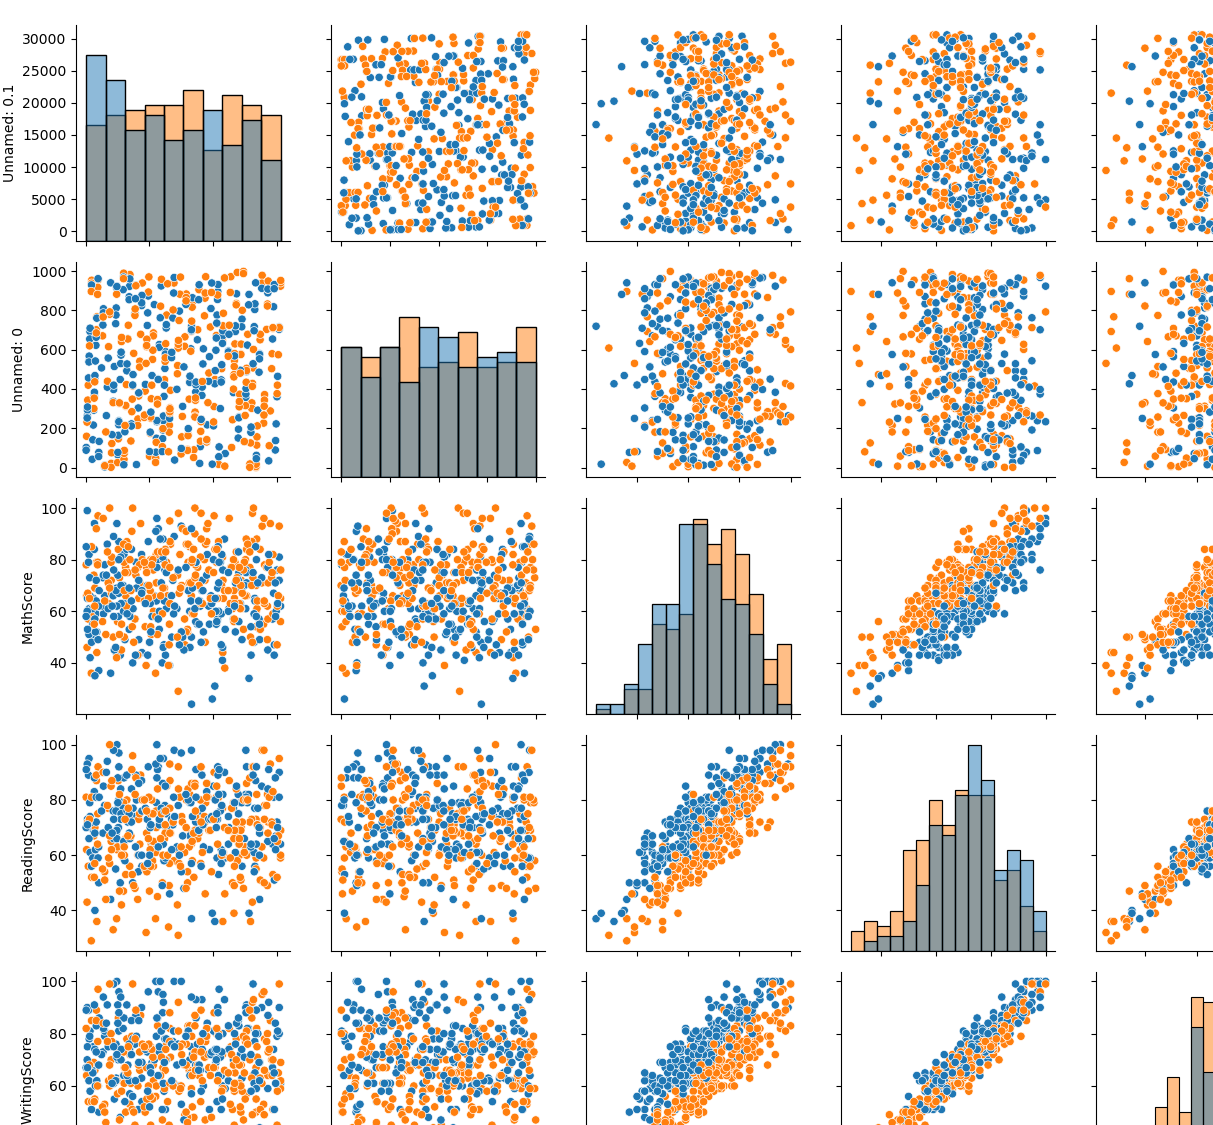

In [16]:
sns.pairplot(df.sample(n=500, random_state=1), hue='Gender', diag_kind='hist')

<IPython.core.display.Javascript object>


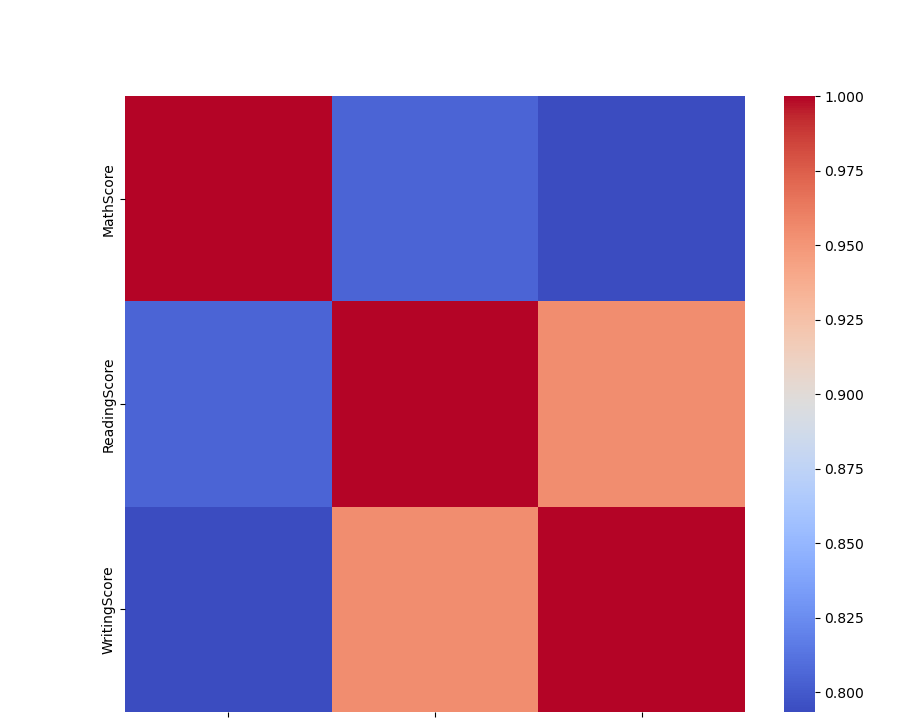

In [15]:
correlation_matrix = df[['MathScore', 'ReadingScore', 'WritingScore']].corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap ')
plt.show()